In [2]:
# mounting google drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


#1. Load packages and data

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams
import os
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

%matplotlib inline
rcParams['figure.figsize'] = 10,8
sns.set(style='whitegrid', palette='muted',
        rc={'figure.figsize': (12,8)})


In [4]:
print(os.listdir('/content/drive/MyDrive/Colab Notebooks/Personal Projects/ALL PROJECTS/IN-PROGRESS/TITANIC PART 1 - EDA WRANGLING/Cleaned_data'))

['test_clean.csv', 'train_clean.csv']


In [5]:
# load data as Pandas dataframe
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Personal Projects/ALL PROJECTS/IN-PROGRESS/TITANIC PART 1 - EDA WRANGLING/Cleaned_data/train_clean.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Personal Projects/ALL PROJECTS/IN-PROGRESS/TITANIC PART 1 - EDA WRANGLING/Cleaned_data/test_clean.csv')
df = pd.concat([train, test], axis=0, sort=True)


In [ ]:
df.head()

,Age,Cabin,Embarked,Family_size,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title
0,22.0,NaN,S,1,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr
1,38.0,C85,C,1,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs
2,26.0,NaN,S,0,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss
3,35.0,C123,S,1,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs
4,35.0,NaN,S,0,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr


In [6]:
def display_all(df):
  """
  designed to display a DataFrame with expanded options for showing a large number of rows and columns
  """
  with pd.option_context("display.max_rows", 1000, 'display.max_columns', 1000): # to display more rows and columns
    display(df)


display_all(df.describe(include='all').T)   # descriptive statistics columns in the DataFrame, and .T transposes the DataFrame

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,1309.0,NaN,NaN,NaN,29.562391,13.16536,0.17,22.0,30.0,35.5,80.0
Cabin,295,186,C23 C25 C27,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Embarked,1309,3,S,915,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Family_size,1309.0,NaN,NaN,NaN,0.883881,1.583639,0.0,0.0,0.0,1.0,10.0
Fare,1309.0,NaN,NaN,NaN,33.276193,51.743584,0.0,7.8958,14.4542,31.275,512.3292
Name,1309,1307,"Connolly, Miss. Kate",2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Parch,1309.0,NaN,NaN,NaN,0.385027,0.86556,0.0,0.0,0.0,0.0,9.0
PassengerId,1309.0,NaN,NaN,NaN,655.0,378.020061,1.0,328.0,655.0,982.0,1309.0
Pclass,1309.0,NaN,NaN,NaN,2.294882,0.837836,1.0,2.0,3.0,3.0,3.0
Sex,1309,2,male,843,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df['Survived'].value_counts()

Survived
0.0    549
1.0    342
Name: count, dtype: int64

#2. Encode categorical variables

We need to convert all categorical variables into numeric format. The categorical variables we will be keeping are Embarked, Sex and Title

The sex variable can be encoded into single 1-or-0 column, but the other variables will need to be one-hot encoded. Regular label encoding assigns some category labels higher numerical values.
This implies some sort of scale (Embarked = 1 is not more than Embarked = 0 - it's just different). One Hot Encoding avoids this problem

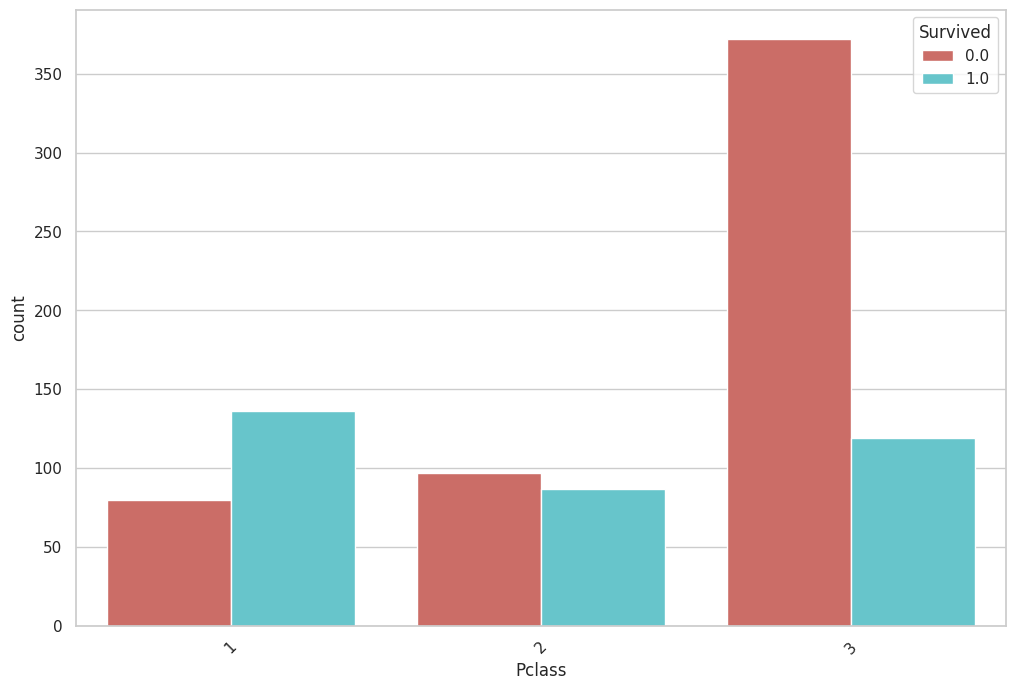

In [ ]:
sns.countplot(x='Pclass', data=df, palette='hls', hue='Survived')
plt.xticks(rotation=45)
plt.show()

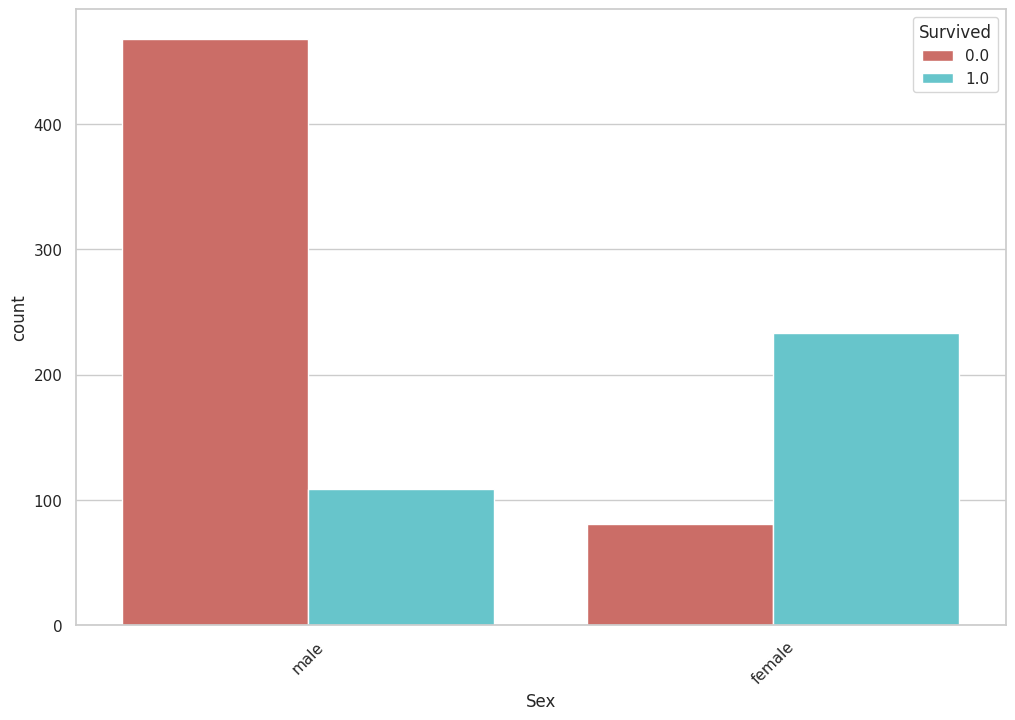

In [ ]:
sns.countplot(x='Sex', data=df, palette='hls', hue='Survived')
plt.xticks(rotation=45)
plt.show()

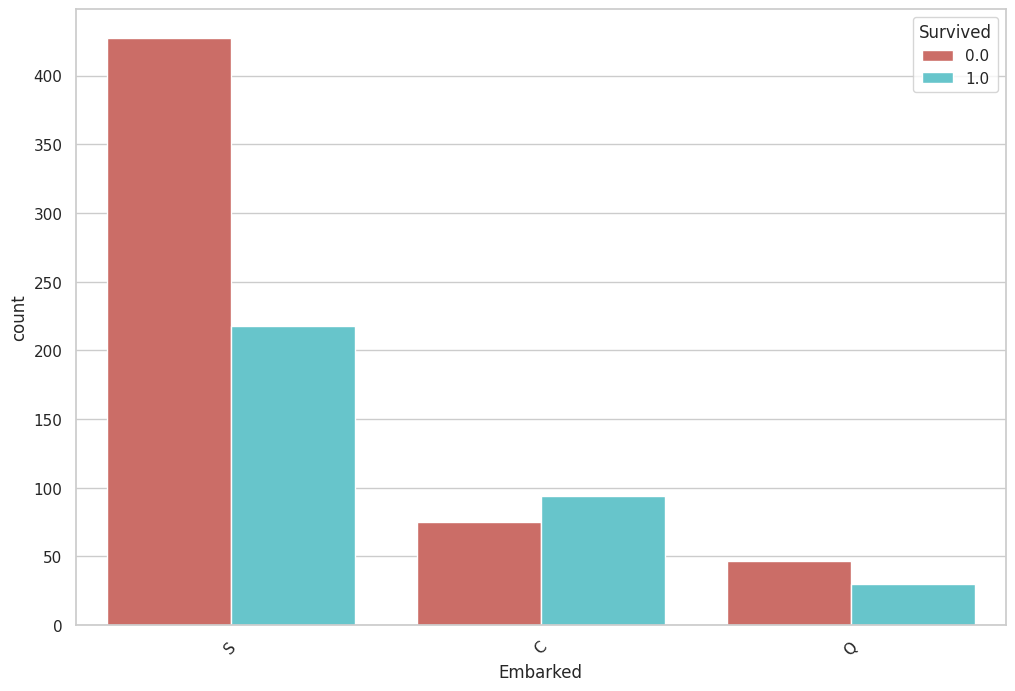

In [ ]:
sns.countplot(x='Embarked', data=df, palette='hls', hue='Survived')
plt.xticks(rotation=45)
plt.show()

In [7]:
# convert to category dtype
df['Sex'] = df['Sex'].astype('category')
# convert to category codes
df['Sex'] = df['Sex'].cat.codes

In [8]:
# subset all categorical variables which need to be encoded
categorical = ['Embarked', 'Title']

for var in categorical:
  df = pd.concat([df,
                  pd.get_dummies(df[var], prefix=var)], axis=1)
  del df[var]

In [9]:
# drop the variables we won't be using
df.drop(['Cabin', 'Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)

In [ ]:
df.head()

,Age,Family_size,Fare,Parch,Pclass,Sex,SibSp,Survived,Embarked_C,Embarked_Q,Embarked_S,Title_Dr,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rev
0,22.0,1,7.2500,0,3,1,1,0.0,False,False,True,False,False,False,True,False,False
1,38.0,1,71.2833,0,1,0,1,1.0,True,False,False,False,False,False,False,True,False
2,26.0,0,7.9250,0,3,0,0,1.0,False,False,True,False,False,True,False,False,False
3,35.0,1,53.1000,0,1,0,1,1.0,False,False,True,False,False,False,False,True,False
4,35.0,0,8.0500,0,3,1,0,0.0,False,False,True,False,False,False,True,False,False


#3. Random Forest

Now all that is left is to feed our data that has been cleaned, encoded and scaled to a random forest.

#3.1 Train/test split

But first, we need to separate data_df back into train and test sets

In [10]:
train = df[pd.notnull(df['Survived'])]
X_test = df[pd.isnull(df['Survived'])].drop (['Survived'], axis=1)

In [ ]:
X_test.head()

,Age,Family_size,Fare,Parch,Pclass,Sex,SibSp,Embarked_C,Embarked_Q,Embarked_S,Title_Dr,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rev
0,34.5,0,7.8292,0,3,1,0,False,True,False,False,False,False,True,False,False
1,47.0,1,7.0000,0,3,0,1,False,False,True,False,False,False,False,True,False
2,62.0,0,9.6875,0,2,1,0,False,True,False,False,False,False,True,False,False
3,27.0,0,8.6625,0,3,1,0,False,False,True,False,False,False,True,False,False
4,22.0,2,12.2875,1,3,0,1,False,False,True,False,False,False,False,True,False


#Validation Set
Since we can't use our test set to assess our model(it doesn't have any labels), we will create a separate 'validation set'. We will use this set to test how our model generalises to unseen data.

In [11]:
X_train, X_val, y_train, y_val = train_test_split(train.drop(['Survived'], axis=1),
                                                  train['Survived'],
                                                  test_size=0.2, random_state=42
)

In [12]:
for i in [X_train, X_val, X_test]:
  print (i.shape)

(712, 16)
(179, 16)
(418, 16)


# Create Random Forest Model
We will first make a random forest model, using all of the default parameters.

    Note: set the random_state to 42 for reproducibility

In [13]:
rf = RandomForestClassifier(random_state=42)

# Train model
Now, let's train the model on our training set

In [14]:
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# Test model

In [15]:
accuracy_score(y_val, rf.predict(X_val))

0.8379888268156425

# 3.2. Cross-validation
Keeping a separate validation set means that we have less data on which to train our model. Cross-validation allows us to train our model on all of the data, while still assessing its performance on unseen data.

K-folds cross validation is the process of creating k different train/validate splits in the data and training the model k times.

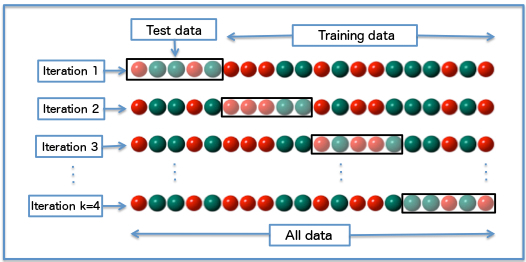

In the image above, k=4. This means that the model will be trained 4 times, each time using 1/4 of the data for validation. In this way, each of the four 'folds' takes one turn sitting out from training and is used as the validation set.

Let's combine our train and validation sets back into one training set, and then use cross-validation to assess our model:

In [16]:
X_train = pd.concat([X_train, X_val])
y_train = pd.concat([y_train, y_val])

In [ ]:
X_train.shape

(891, 16)

Now we have all training data again. Let's fit a model to it, and assess it's accuracy using 5-fold cross-validation

In [17]:
rf = RandomForestClassifier(n_estimators=10, random_state=42)
cross_val_score(rf, X_train, y_train, cv=5)

array([0.77653631, 0.85393258, 0.79213483, 0.83146067, 0.78651685])

In [18]:
cross_val_score(rf, X_train, y_train, cv=5).mean()

0.8081162513338773

# 3.3. Hyperparameter tuning
Our first model didn't do too badly! It scored over 80% on the CV score. However, we didn't put any thought into our choice of hyperparameters, we simply went with the defaults.

Take a look at the various parameters by using the help() function:

In [ ]:
help(RandomForestClassifier)

Help on class RandomForestClassifier in module sklearn.ensemble._forest:

class RandomForestClassifier(ForestClassifier)
 |  RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
 |  
 |  A random forest classifier.
 |  
 |  A random forest is a meta estimator that fits a number of decision tree
 |  classifiers on various sub-samples of the dataset and uses averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is controlled with the `max_samples` parameter if
 |  `bootstrap=True` (default), otherwise the whole dataset is used to build
 |  each tree.
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  Parameters
 |  ----------


It is hard to know the best values for each of these hyperparameters without first trying them out. If we wanted to know the best value for the n_estimators parameter, we could fit a few models, each with a different value, and see which one tests the best.

Grid search allows us to do this for multiple parameters simultaneously. We will select a few different parameters that we want to tune, and for each one we will provide a few different values to try out. Then grid search will fit models to every possible combination of these parameter values and use cross-validation to assess the performance in each case.

Furthermore, since we are using CV, we don't need to keep a separate validation set.

# 3.2.1. Number of estimators and max depth
We will start by tuning the n_estimators (number of trees in the forest) and the max_depth (how deep each tree grows) parameters.

The first step that we need to do is to define the grid of parameters over which to search:

In [19]:
# create the grid
n_estimators = [10, 100, 1000, 2000]
max_depth = [None, 5, 10, 20]
param_grid = dict(n_estimators=n_estimators, max_depth=max_depth)

We have set out a total of  4×4=16
  models over which to search. Grid search uses cross-validation on each of the models, so if we use 3-folds cross-validation, that will leave us with 48 different fits to try out. (You can see how the number of fits can grow pretty quickly as we increase the number of parameters!)

The good news is that SkLearn's grid search allows us to run the job in parallel. Including the n_jobs=-1 argument below let's grid search run on all of the available cores on the host machine.

In [20]:
# create the default model
rf = RandomForestClassifier(random_state=42)

# search the grid
grid = GridSearchCV(estimator=rf,
                    param_grid=param_grid,
                    cv=3,
                    verbose=2,
                    n_jobs=-1)

grid_result = grid.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


Now let's take a look at the results of the grid search.

We can get the best performing model directly from grid_result:

In [21]:
grid_result.best_estimator_

RandomForestClassifier(max_depth=5, n_estimators=2000, random_state=42)

or just the best parameters

In [22]:
grid_result.best_params_

{'max_depth': 5, 'n_estimators': 2000}

or the best score

In [23]:
grid_result.best_score_

0.8338945005611672

But let's take a look at all of the models so we can make a more informed decision

In [24]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.833895 using {'max_depth': 5, 'n_estimators': 2000}
0.786756 (0.023056) with: {'max_depth': None, 'n_estimators': 10}
0.801347 (0.018027) with: {'max_depth': None, 'n_estimators': 100}
0.806958 (0.015141) with: {'max_depth': None, 'n_estimators': 1000}
0.806958 (0.013837) with: {'max_depth': None, 'n_estimators': 2000}
0.827160 (0.023381) with: {'max_depth': 5, 'n_estimators': 10}
0.832772 (0.016571) with: {'max_depth': 5, 'n_estimators': 100}
0.832772 (0.016571) with: {'max_depth': 5, 'n_estimators': 1000}
0.833895 (0.017887) with: {'max_depth': 5, 'n_estimators': 2000}
0.821549 (0.016722) with: {'max_depth': 10, 'n_estimators': 10}
0.818182 (0.014547) with: {'max_depth': 10, 'n_estimators': 100}
0.818182 (0.021472) with: {'max_depth': 10, 'n_estimators': 1000}
0.814815 (0.021472) with: {'max_depth': 10, 'n_estimators': 2000}
0.786756 (0.023381) with: {'max_depth': 20, 'n_estimators': 10}
0.801347 (0.019244) with: {'max_depth': 20, 'n_estimators': 100}
0.806958 (0.015141) with

# 3.2.2 Leaf size
the min_samples_lef argument controls the size of the leaves in the trees.

We will set out the grid in a similar manner as before, only this time we will use the max_depth and n_estimators parameters that we found above.

In [25]:
# create the grid
leaf_samples = [1, 2, 3, 4, 5, 6]
param_grid = dict(min_samples_leaf=leaf_samples)

# create the model with new max_depth and n_estimators
rf = grid_result.best_estimator_

# search the grid
grid = GridSearchCV(estimator=rf,
                    param_grid=param_grid,
                    cv=3,
                    verbose=2,
                    n_jobs=1)

grid_result = grid.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] END .................................min_samples_leaf=1; total time=   8.5s
[CV] END .................................min_samples_leaf=1; total time=   6.6s
[CV] END .................................min_samples_leaf=1; total time=   9.3s
[CV] END .................................min_samples_leaf=2; total time=   5.9s
[CV] END .................................min_samples_leaf=2; total time=  12.2s
[CV] END .................................min_samples_leaf=2; total time=   6.4s
[CV] END .................................min_samples_leaf=3; total time=   8.5s
[CV] END .................................min_samples_leaf=3; total time=   4.5s
[CV] END .................................min_samples_leaf=3; total time=   7.1s
[CV] END .................................min_samples_leaf=4; total time=   6.7s
[CV] END .................................min_samples_leaf=4; total time=   9.0s
[CV] END .................................min_sam

In [28]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.833895 using {'min_samples_leaf': 1}
0.833895 (0.017887) with: {'min_samples_leaf': 1}
0.832772 (0.019309) with: {'min_samples_leaf': 2}
0.832772 (0.019309) with: {'min_samples_leaf': 3}
0.831650 (0.018027) with: {'min_samples_leaf': 4}
0.831650 (0.018027) with: {'min_samples_leaf': 5}
0.832772 (0.019309) with: {'min_samples_leaf': 6}


# 3.2.3 To bag or not to bag
Bootstrap aggregating (or bagging) is a special case of the random forest wherew we bootstrap (sample with replacement) from the n training observations to create a new training set of size n for each tree. Furthermore, each tree considers all variable when making each split.

We can use grid search to determine if bootstrapping will be an appropriate method to use.

In [29]:
# create the grid
max_features = [5, 8, 10, 12, None]
bootstrap = [True, False]
param_grid = dict(max_features=max_features, bootstrap=bootstrap)

# create the model with new leaf size
rf = grid_result.best_estimator_

# search the grid
grid = GridSearchCV(estimator=rf,
                    param_grid=param_grid,
                    cv=3,
                    verbose=2,
                    n_jobs=-1)

grid_result = grid.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [30]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.832772 using {'bootstrap': True, 'max_features': 5}
0.832772 (0.019309) with: {'bootstrap': True, 'max_features': 5}
0.830527 (0.013837) with: {'bootstrap': True, 'max_features': 8}
0.829405 (0.016571) with: {'bootstrap': True, 'max_features': 10}
0.829405 (0.019309) with: {'bootstrap': True, 'max_features': 12}
0.829405 (0.019504) with: {'bootstrap': True, 'max_features': None}
0.831650 (0.020756) with: {'bootstrap': False, 'max_features': 5}
0.829405 (0.017887) with: {'bootstrap': False, 'max_features': 8}
0.824916 (0.020756) with: {'bootstrap': False, 'max_features': 10}
0.823793 (0.019504) with: {'bootstrap': False, 'max_features': 12}
0.818182 (0.023489) with: {'bootstrap': False, 'max_features': None}


# 4. Make Predictions on Test Set

Finally, we can attempt to predict which passengers in the test set survived.


In [31]:
rf = grid_result.best_estimator_

In [32]:
# test our CV score
cross_val_score(rf, X_train, y_train, cv=5).mean()

0.8327851358985626

In [33]:
test['Survived'] = rf.predict(X_test)

In [36]:
solution = test[['PassengerId', 'Survived']]
solution['Survived'] = solution['Survived'].apply(int)

<ipython-input-36-045cc2177bcf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  solution['Survived'] = solution['Survived'].apply(int)


In [37]:
solution.head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [38]:
solution.to_csv("Random_Forest_Solution.csv", index=False)